In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Multiple Layer GRU

In [9]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.callbacks import History
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling1D, LSTM, Embedding, Bidirectional, GRU, Conv1D, GlobalAveragePooling1D
from tensorflow.compat.v1.data import get_output_shapes
from tensorflow.keras.backend import clear_session
from tensorflow.compat.v1 import reset_default_graph
print(tf.__version__)

2.4.1


In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset: tf.raw_ops.PrefetchDataset = dataset["train"]
test_dataset: tf.raw_ops.PrefetchDataset = dataset["test"]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete933EKO/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete933EKO/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete933EKO/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer: tfds.deprecated.text.SubwordTextEncoder = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset: tf.raw_ops.ShuffleDataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset: tf.raw_ops.PaddedBatchDataset = train_dataset.padded_batch(BATCH_SIZE, get_output_shapes(train_dataset))
test_dataset: tf.raw_ops.PaddedBatchDataset = test_dataset.padded_batch(BATCH_SIZE, get_output_shapes(test_dataset))

In [7]:
model = Sequential([
    Embedding(input_dim=tokenizer.vocab_size, output_dim=64, name="embedding_1", input_length=None),    # input_length=None表示长度可变
    Conv1D(filters=128, kernel_size=5, activation="relu", name="conv1d_2"),
    GlobalAveragePooling1D(name="poolavg1d_2"),
    Dense(units=64, activation='relu', name="dense_3"),
    Dense(units=1, activation='sigmoid', name="dense_4")
], name="IMDBsubwords_classifier")
model.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)
model.summary()

Model: "IMDBsubwords_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 128)         41088     
_________________________________________________________________
poolavg1d_2 (GlobalAveragePo (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [11]:
NUM_EPOCHS = 10
history: History = model.fit(
    train_dataset, 
    validation_data=test_dataset,
    epochs=NUM_EPOCHS, 
    workers=-1,
    use_multiprocessing=True
)

Epoch 1/10
391/391 [==============================] - 15s 37ms/step - loss: 0.0339 - accuracy: 0.9888 - val_loss: 0.8564 - val_accuracy: 0.8495
Epoch 2/10
391/391 [==============================] - 15s 36ms/step - loss: 0.0243 - accuracy: 0.9933 - val_loss: 1.0102 - val_accuracy: 0.8476
Epoch 3/10
391/391 [==============================] - 15s 37ms/step - loss: 0.0190 - accuracy: 0.9956 - val_loss: 1.0634 - val_accuracy: 0.8472
Epoch 4/10
391/391 [==============================] - 15s 36ms/step - loss: 0.0164 - accuracy: 0.9960 - val_loss: 1.2209 - val_accuracy: 0.8510
Epoch 5/10
391/391 [==============================] - 15s 36ms/step - loss: 0.0206 - accuracy: 0.9937 - val_loss: 1.0805 - val_accuracy: 0.8478
Epoch 6/10
391/391 [==============================] - 15s 36ms/step - loss: 0.0148 - accuracy: 0.9961 - val_loss: 1.2890 - val_accuracy: 0.8465
Epoch 7/10
391/391 [==============================] - 15s 37ms/step - loss: 0.0138 - accuracy: 0.9961 - val_loss: 1.2996 - val_accuracy:

In [12]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

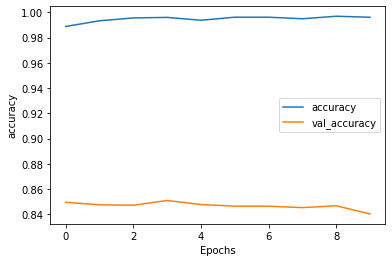

In [13]:
plot_graphs(history, 'accuracy')

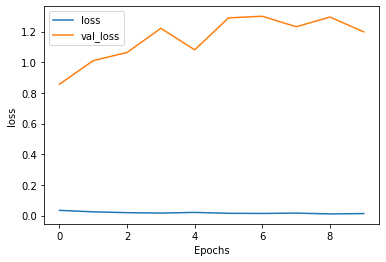

In [14]:
plot_graphs(history, 'loss')